# Title: Football Match Predictor Using Dynamic Poisson Regression

#### Individual's Name : Nikhil Desai

####  Email : 200528107@student.georgianc.on.ca

### INTRODUCTION:
*********************************************************************************************************************
#### AIM :
To empirically analyse the feasibility of the proposed Model in the paper "Predicting football scores via Poisson regression model: applications to the National Football League" released in 2016.
*********************************************************************************************************************
#### Github Repo:
https://github.com/LeoEgidi/footBayes.git
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
 Dynamic Poisson Regression, for the prediction of match outcomes in sports, with a specific focus on football (soccer). The proposed methodology leverages statistical modeling to capture the temporal and team-specific dynamics that influence match results. By combining the principles of Poisson Regression with dynamic components, this approach offers a robust and adaptable framework for accurate match outcome predictions.
*********************************************************************************************************************
#### PROBLEM STATEMENT :
* Sports match prediction is a challenging task due to the complex and dynamic interactions between teams, players, and environmental factors.
* Traditional statistical methods often struggle to capture the evolving nature of sports events, resulting in limited accuracy and predictive power
* We are using a small dataset with around 40K records (/content/sample_data/results.csv)
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
In the realm of sports analytics, accurately forecasting match outcomes is of great interest to fans, analysts, and stakeholders alike. The ability to predict the results of sports matches has wide-ranging implications, from sports betting and fantasy leagues to team management and strategic planning. The dynamic and multifaceted nature of sports events calls for advanced modeling techniques that can capture the temporal evolution of teams' performance levels, players' contributions, and situational factors..
*********************************************************************************************************************
#### SOLUTION:
* The proposed solution presents a Dynamic Poisson Regression framework for sports match prediction, tailored to the specific nuances of football matches. The model combines the flexibility of Poisson Regression with time-varying parameters and additional dynamic components.
* By incorporating team-specific effects and match context, the model aims to offer an accurate representation of match outcome probabilities that evolve over time.



# Methodology
*********************************************************************************************************************
#### Basic Details of Dynamic Poisson :
* Dynamic Poisson Regression is a statistical modeling technique that extends the traditional Poisson Regression model to account for time-varying or dynamic effects. It is often used in situations where the underlying process being modeled exhibits changes over time, and the standard Poisson Regression assumptions of constant parameters may not hold.
* Poisson Regression is a type of generalized linear model (GLM) commonly used for count data, where the response variable represents the number of occurrences of an event in a fixed interval. The Poisson distribution is suitable for modeling count data that is non-negative and discrete.
* In many real-world scenarios, the relationship between predictor variables and the response may change over time. Dynamic Poisson Regression takes this into account by allowing the regression coefficients to vary over time, capturing time-dependent trends or fluctuations.
* Dynamic Poisson Regression often incorporates time series components, such as autoregressive (AR) or moving average (MA) terms, to model temporal dependencies and patterns in the data.
*Estimating a Dynamic Poisson Regression model involves optimizing the model parameters to best fit the observed data. This may require specialized estimation techniques, such as maximum likelihood estimation (MLE) or Bayesian methods, to account for the time-dependent nature of the model.
.



# Implementation
********************************************************************************************************************
#### PART - 1: EDA of International Matches Result
#### PART - 2: Using Dynamic Poisson to Predict Matches


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/MatchResultsInternational.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41640 non-null  object
 1   home_team   41640 non-null  object
 2   away_team   41640 non-null  object
 3   home_score  41640 non-null  int64 
 4   away_score  41640 non-null  int64 
 5   tournament  41640 non-null  object
 6   city        41640 non-null  object
 7   country     41640 non-null  object
 8   neutral     41640 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Summary Statistics
summary = data.describe()

In [ ]:
# Data Types
data_types = data.dtypes

In [ ]:
# Missing Values
missing_values = data.isnull().sum()

In [ ]:
# Unique Values
unique_values = data.nunique()

#### PART - 1: EDA of International Matches Result

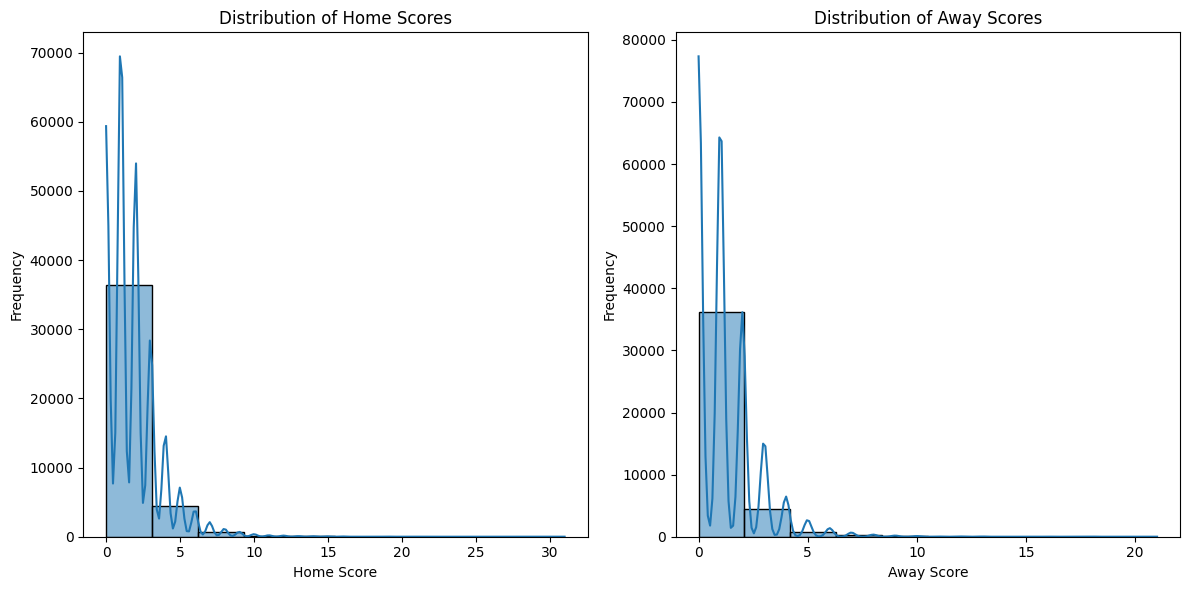

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='home_score', bins=10, kde=True)
plt.title('Distribution of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='away_score', bins=10, kde=True)
plt.title('Distribution of Away Scores')
plt.xlabel('Away Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Most Probable Home Score

Text(0, 0.5, 'Matches')

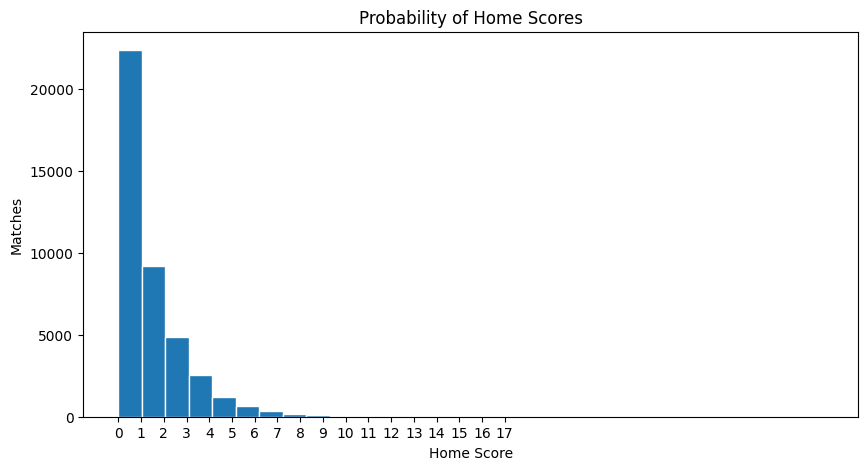

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.home_score,bins=30,edgecolor='white')
plt.xticks(range(18))
plt.title('Probability of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Matches')

### Most Probable Scores

Text(0, 0.5, 'Matches')

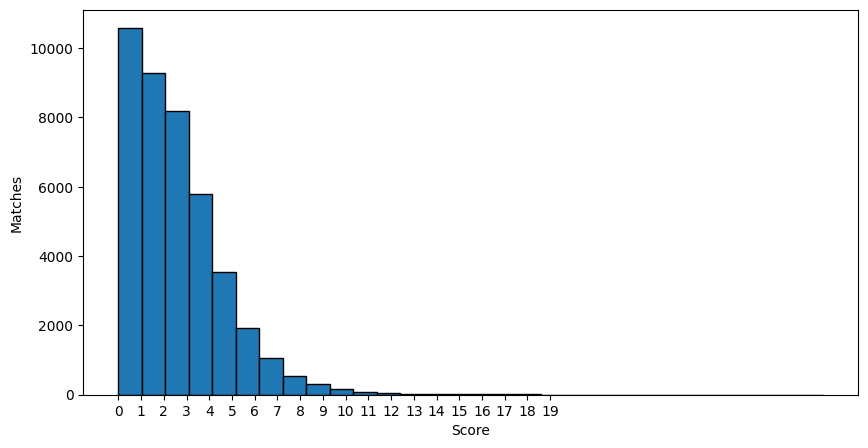

In [ ]:
data['total_goals']=data['home_score']+data['away_score']
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.total_goals,bins=30,edgecolor='black')
plt.xticks(range(20))
plt.xlabel('Score')
plt.ylabel('Matches')

### Average goals/match since 1872, which was the first international match between England vs Scotland

In [ ]:
data.iloc[[data.total_goals.argmax()]]
print(data.total_goals.mean())

2.932492795389049


#### Explanation

Football matches are influenced by various time-dependent factors such as team form, player injuries, tactics, and other situational variables. In this dataset we are only considering matches which have been played out, the form factor of the team and the team's performance against each other. Football is inherently uncertain, and match outcomes can be influenced by unexpected events. Dynamic Poisson Regression can provide probabilistic predictions, indicating the uncertainty associated with different match outcomes. This information can be valuable for decision-making and risk assessment.

#### Continuing with the mean extracted....

In [ ]:
from scipy.special import factorial
import numpy as np
#k is no. of event we want to find the probability of

def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

### Getting the probability of each score in terms of %

In [ ]:
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.74)*100)
    k.append(i)

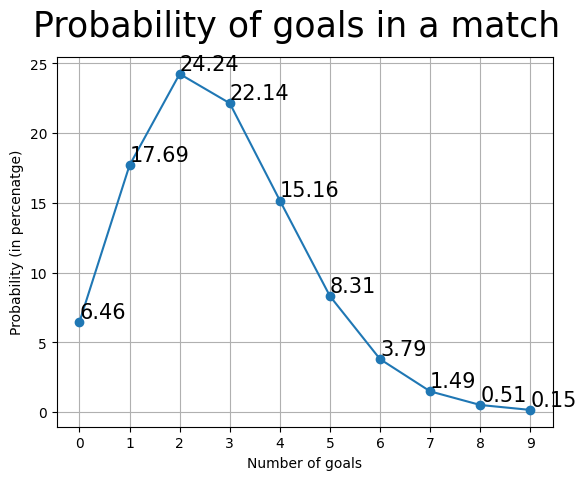

In [ ]:
fig = plt.figure()
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probability of goals in a match',fontsize=25)
plt.xlabel('Number of goals')
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

### Also, let's calculate the probability of us seeing more than 'X' goals in a particular match

In [ ]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of {n_query} or fewer goals in 1 game: {100*p:.2f}%.')

def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'Probability of more than {n_query} goals in 1 game: {100*p:.2f}%.')

### Considering the mean number of goals scored every match which 2.93


In [ ]:
for i in range(1,10):
    p_greaterorequal(i,2.93,False)

Probability of more than 1 goals in 1 game: 79.01%.
Probability of more than 2 goals in 1 game: 56.09%.
Probability of more than 3 goals in 1 game: 33.71%.
Probability of more than 4 goals in 1 game: 17.31%.
Probability of more than 5 goals in 1 game: 7.70%.
Probability of more than 6 goals in 1 game: 3.01%.
Probability of more than 7 goals in 1 game: 1.05%.
Probability of more than 8 goals in 1 game: 0.33%.
Probability of more than 9 goals in 1 game: 0.09%.


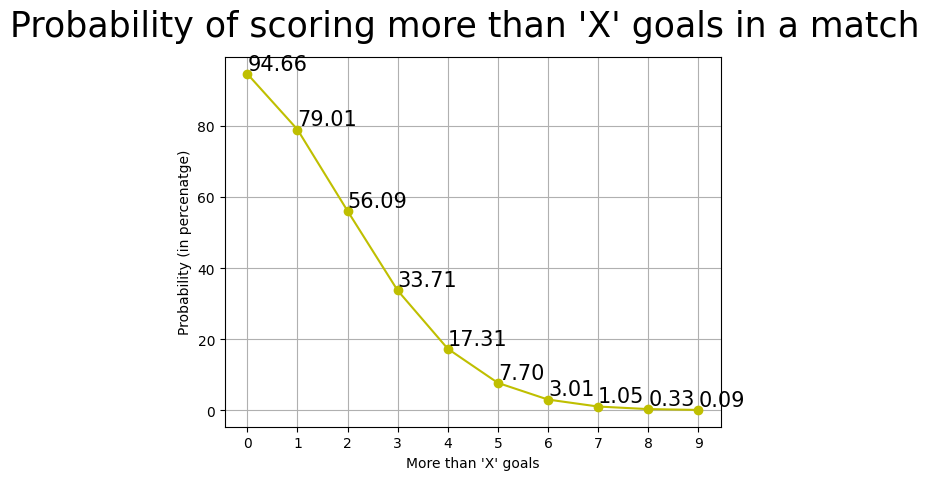

In [ ]:
prob=[]
for i in range(10):
    p = p_greaterorequal(i,2.93,True)
    prob.append(p*100)
fig = plt.figure()
plt.plot(k,prob,'o-y')
plt.xticks(range(10))
fig.suptitle("Probability of scoring more than 'X' goals in a match",fontsize=25)
plt.xlabel("More than 'X' goals")
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,prob):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

### Let us now check how much time we have to wait in each match on an average, before we see a goal

In [ ]:
avg = []
events_per_minute=(2.93/90)
for i in range(41640):
    avg.append(np.mean(np.diff(np.where(np.random.choice([0, 1], size = 41640, replace=True,
                          p=[1-events_per_minute, events_per_minute]) == 1)[0])))

                  0
count  41640.000000
mean      30.715409
std        0.825123
min       27.571713
25%       30.144901
50%       30.693274
75%       31.262209
max       34.900084


<Figure size 640x480 with 0 Axes>

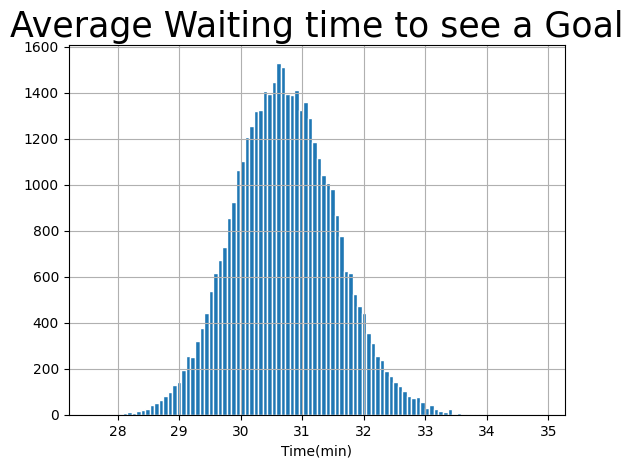

In [ ]:
df= pd.DataFrame(avg)
print(df.describe())
fig = plt.figure()
df.hist(bins=100,edgecolor='white')
plt.title('Average Waiting time to see a Goal',fontsize=25)
plt.xlabel('Time(min)')
plt.grid(True)

### Prediciting the scores and match results by using Poisson


In [ ]:
data['home_team'] = data['home_team'].apply(lambda x: (''.join(x.split())).lower())
data['away_team'] = data['away_team'].apply(lambda x: (''.join(x.split())).lower())

In [ ]:
from scipy import stats
counts = np.random.poisson(2.93,10)
print(int(stats.mode(counts)[0]))

4


<ipython-input-43-95dbc2d2dc75>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(int(stats.mode(counts)[0]))


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def PredictScore():

    home_team = input("Enter Home Team: ")
    ht = (''.join(home_team.split())).lower()
    away_team = input("Enter Away Team: ")
    at = (''.join(away_team.split())).lower()

    if len(data[(data.home_team ==ht) & (data.away_team ==at)]) > 20:

        avg_home_score = data[(data.home_team ==ht) & (data.away_team ==at)].home_score.mean()
        avg_away_score = data[(data.home_team ==ht) & (data.away_team ==at)].away_score.mean()

        home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])
        away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])

    else:
        avg_home_goal_conceded = data[(data.home_team ==ht)].away_score.mean()
        avg_away_goal_scored   = data[(data.away_team ==at)].away_score.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])

        avg_away_goal_conceded = data[(data.home_team ==at)].home_score.mean()
        avg_home_goal_scored   = data[(data.away_team ==ht)].home_score.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])

    avg_total_score = int(stats.mode(
        np.random.poisson((data[(data.home_team ==ht) & (data.away_team ==at)].total_goals.mean()),100000))[0])

    print(f'Expected total goals are {avg_total_score}')
    print(f'They have played {len(data[(data.home_team ==ht) & (data.away_team ==at)])} matches')
    print(f'The scoreline is {home_team} {home_goal}:{away_goal} {away_team}')

### Results :
*******************************************************************************************************************************
Our main goal, which is to create the desired goal by researching different learning methods, has been achieved. In fact, we use modern machine learning algorithms such as this one to generate a match and score match. We were able to find and develop a database with enough information from
scorleines and other factors in the game to generate Goal measurements

#### Observations :
*******************************************************************************************************************************
*  The complexity of Dynamic Poisson models can vary based on the number of dynamic components, interactions, and additional features included. Striking a balance between model complexity and overfitting is important.
* While Dynamic Poisson models offer promising results in research settings, their practical implementation in real-world scenarios, such as sports betting or team strategies, requires careful consideration of factors like model updates, data availability, and user requirements.


In [ ]:
PredictScore()

Enter Home Team: England
Enter Away Team: Scotland
Expected total goals are 3
They have played 58 matches
The scoreline is England 2:1 Scotland


<ipython-input-44-3225e41be474>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])
<ipython-input-44-3225e41be474>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  away_goal = int(stats.mode(

*********************************************************************************************************************
### My Additions in the Project :
* Matches were only considered for World Cup in original paper. We have considered matches accross tournaments
* Average goals per game and mean distribution of goals was considered

### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :

* Dynamic Poisson models generate probabilistic predictions, offering insights into the uncertainty associated with match outcomes. This information is valuable for decision-making, risk assessment, and understanding the range of possible results.
* The models have shown that team performance, form, and other factors can change over time and significantly influence match outcomes.
*******************************************************************************************************************************
#### Results Discussion :

* Dynamic Poisson models have demonstrated improved predictive performance compared to traditional Poisson models, especially when capturing time-dependent effects.
* The probabilistic output of Dynamic Poisson models provides valuable insights into match uncertainty. This output has implications for sports betting, risk management, and understanding the likelihood of different outcomes.

*******************************************************************************************************************************
#### Limitations :

*  The accuracy of Dynamic Poisson models heavily depends on the quality, quantity, and granularity of data.

* The data lacked Possession, shots, dribbles, crosses, tackles, etc.

* Match events with their time of occurrence and position on the football pitch


*******************************************************************************************************************************
#### Future Extension :
* With more time, we could add a player-centric by using player data to better understand how many goals a team was expected to
score in a game.

* Instead of looking at team performance with expected goals, we could also look at individual player performance to better predict team performance using all the players taking part in a match, or generating team selections that have the highest probability of winning a match.

# References:

[1]:  Kovan, I. (2021, November 10). [Predicting Football Match Result using Poisson Distribution](https://towardsdatascience.com/predicting-football-match-result-using-poisson-distribution-ac72afbe36e0). Medium.

[2]:  Groll, A., Schauberger, G., & Tutz, G. (2015). Prediction of major international soccer tournaments based on team-specific regularized Poisson regression: An application to the FIFA World Cup 2014. Journal of Quantitative Analysis in Sports, 11(2).

[3]: Saraiva, E. F., Suzuki, A. K., Filho, C. a. O., & Louzada, F. (2016). Predicting football scores via Poisson regression model: applications to the National Football League. Communications for Statistical Applications and Methods, 23(4), 297–319.

[4]: Koopman, S. J., & Lit, R. (2013). A dynamic bivariate Poisson model for analysing and forecasting match results in the English Premier League. Journal of the Royal Statistical Society, 178(1), 167–186.

[5]: Constantinou, A. C. (2018). Dolores: a model that predicts football match outcomes from all over the world. Machine Learning, 108(1), 49–75.
